<a href="https://colab.research.google.com/github/jamesjulius-02/Gradient-Boosting/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Accuracy: 1.0
Confusion Matrix:
[[2]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Feature Importances:
                  Importance
Years_Experience         1.0
Age                      0.0
Income                   0.0


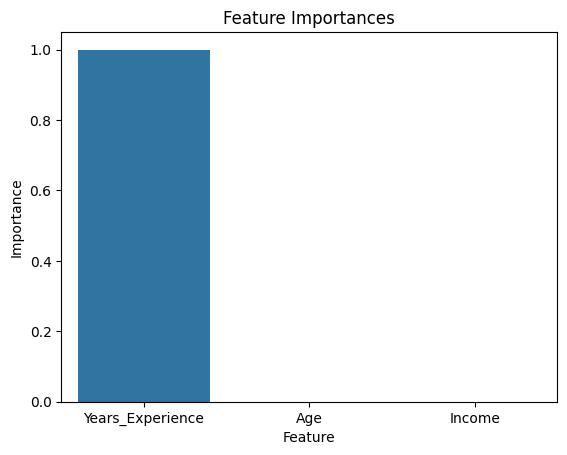

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
data = {
 'Age': [25, 45, 35, 50, 23, 37, 32, 28, 40, 27],
 'Income': [50000, 60000, 70000, 80000, 20000, 30000, 40000, 55000, 65000, 75000],
 'Years_Experience': [1, 20, 10, 25, 2, 5, 7, 3, 15, 12],
 'Loan_Approved': [0, 1, 1, 1, 0, 0, 1, 0, 1, 1]
}
df = pd.DataFrame(data)

# Independent variables (features) and dependent variable (target)
X = df[['Age', 'Income', 'Years_Experience']]
y = df['Loan_Approved']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating and training the gradient boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Feature importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(f"Feature Importances:\n{feature_importances}")

# Plotting the feature importances
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()
